# Projet 5 : Analyse

Bonjour, ceci est le premier notebook du projet 5 de la formation Data Scientist pour OpenClassrooms.

Dans un premier temps, j'observe les données qui me sont proposées. Elles sont réparties en 8 datasets distincts, avec un lien non-central entre chaque dataset. Il va donc falloir être précautionneux pour les regrouper.

## 1. Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## 2. Récupération et préparation des données

### 2.1 Chargement des données

In [2]:
customers = pd.read_csv('olist_customers_dataset.csv')
customers.shape

(99441, 5)

In [3]:
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
geolocation.shape

(1000163, 5)

In [4]:
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_items.shape

(112650, 7)

In [5]:
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
order_payments.shape

(103886, 5)

In [6]:
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
order_reviews.shape

(99224, 7)

In [7]:
orders = pd.read_csv('olist_orders_dataset.csv')
orders.shape

(99441, 8)

In [8]:
products = pd.read_csv('olist_products_dataset.csv')
products.shape

(32951, 9)

In [9]:
sellers = pd.read_csv('olist_sellers_dataset.csv')
sellers.shape

(3095, 4)

### 2.2 Regrouper 8 datasets en un seul

D'après le [Data Schema](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce) fourni dans le dossier , on peut relier chacun de ces datasets par au moins une feature.
L'un des problèmes est que tous ces datasets ne sont pas de la même taille, on ne peut donc pas juste les concaténer.

![Data Schema](https://i.imgur.com/HRhd2Y0.png)

Mon objectif final est d'analyser le comportement des *clients*, j'ai donc envie de prendre comme point de départ le dataset customers. J'ai envie, dans un premier temps, de grouper "customers" et "orders"

In [10]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [11]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [12]:
#Je vérifie l'absence de doublons ou de données manquantes de part et d'autre
customers.duplicated().sum()

0

In [13]:
orders.duplicated().sum()

0

In [14]:
customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [15]:
#Aucune valeur manquante
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [16]:
#Acceptable, on regardera cela plus tard. L'important étant les "id" ici.
#Je veux aussi vérifier qu'il n'y a pas de doublons d'identité
orders["customer_id"].duplicated().sum()

0

Il semblerait qu'on peut simplement fusionner ces deux dataframes, de plus ce sont les seuls à avoir la même taille.

In [17]:
fusion = pd.merge(customers, orders, on = 'customer_id')

In [18]:
fusion.shape

(99441, 12)

Bien, cette première fusion s'est déroulée sans accroc.
Je vais maintenant m'intéresser à toutes les conenxions avec "orders", c'est à dire :
- order payments
- order reviews
- order items

et essayer de les fusionner, de nouveau, avec mon nouveau dataframe "fusion".

Cette fois-ci, ce n'est plus le "customer id" qu'on a en commun mais le "order id"

In [19]:
#Commençons par oreder payments. Pour rappel, sa taille est trop grande.
order_payments.shape

(103886, 5)

In [20]:
#Peut-être y a-t-il des doublons ?
order_payments.duplicated().sum()

0

In [21]:
#Il n'y a pas de doublons... Peut-être des doublons sur le order id
order_payments["order_id"].duplicated().sum()

4446

In [22]:
#à 1 près, il s'agit de la différence de taille entre nos dataframes.

In [23]:
order_payments.dtypes

order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

In [24]:
order_payments.groupby("order_id").agg({'payment_sequential':sum,'payment_installments':sum,'payment_value':sum}).reset_index()

,order_id,payment_sequential,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,2,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,3,259.83
2,000229ec398224ef6ca0657da4fc703e,1,5,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,2,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,3,218.04
...,...,...,...,...
99435,fffc94f6ce00a00581880bf54a75a037,1,1,343.40
99436,fffcd46ef2263f404302a634eb57f7eb,1,1,386.53
99437,fffce4705a9662cd70adb13d4a31832d,1,3,116.85
99438,fffe18544ffabc95dfada21779c9644f,1,3,64.71


In [25]:
#je créé un dataframe temporaire pour afficher mes doublons
doublons = order_payments.loc[order_payments["order_id"].duplicated() == True,:]
doublons.head() 

,order_id,payment_sequential,payment_type,payment_installments,payment_value
1456,683bf306149bb869980b68d48a1bd6ab,1,credit_card,1,8.58
2324,e6a66a8350bb88497954d37688ab123e,2,voucher,1,10.51
2393,8e5148bee82a7e42c5f9ba76161dc51a,1,credit_card,1,0.67
2414,816ccd9d21435796e8ffa9802b2a782f,1,credit_card,1,5.65
2497,2cbcb371aee438c59b722a21d83597e0,2,voucher,1,7.80


In [26]:
# En fait, je voudrais afficher les DEUX paiements correspondant aux doublons, à chaque fois.
sans_doublons = order_payments.drop_duplicates("order_id")
jeveuxvoir = pd.merge(doublons,sans_doublons,on="order_id")
jeveuxvoir.head(50)

,order_id,payment_sequential_x,payment_type_x,payment_installments_x,payment_value_x,payment_sequential_y,payment_type_y,payment_installments_y,payment_value_y
0,683bf306149bb869980b68d48a1bd6ab,1,credit_card,1,8.58,2,voucher,1,30.00
1,e6a66a8350bb88497954d37688ab123e,2,voucher,1,10.51,4,voucher,1,8.24
2,e6a66a8350bb88497954d37688ab123e,6,voucher,1,17.30,4,voucher,1,8.24
3,e6a66a8350bb88497954d37688ab123e,1,voucher,1,4.95,4,voucher,1,8.24
4,e6a66a8350bb88497954d37688ab123e,3,voucher,1,5.75,4,voucher,1,8.24
5,e6a66a8350bb88497954d37688ab123e,7,voucher,1,16.11,4,voucher,1,8.24
6,e6a66a8350bb88497954d37688ab123e,5,voucher,1,19.16,4,voucher,1,8.24
7,e6a66a8350bb88497954d37688ab123e,8,voucher,1,9.83,4,voucher,1,8.24
8,8e5148bee82a7e42c5f9ba76161dc51a,1,credit_card,1,0.67,2,voucher,1,156.55
9,816ccd9d21435796e8ffa9802b2a782f,1,credit_card,1,5.65,5,voucher,1,27.91


In [27]:
#Cette commande me confirme qu'il n'y a aucun "triplon", les doublons sont à chaque fois 2 paiements séparés.
jeveuxvoir.shape

(4446, 9)

J'ai vu ce que je voulais voir. S'il y a des doublons, c'est essentiellement parce que les clients ont utilisé un bon de réduction/carte cadeau. En bref, ils ont utilisé DEUX moyens de paiement, et cela se retrouve en deux lignes dans nos données.
Pour fusionner ces lignes, je vais :
- fusionner les identifiants (c'est déjà fait)
- Pour "payment sequential", je ne comprends pas vraiment le sens de cette ligne pour l'instant. Je ne suis pas certain qu'elle soit pertinente pour la suite, je vais additionner les deux (?)
- Pour le "payment type", je choisis celui des deux pour lequel le montant est le plus important.
- Pour les "installments", j'additionne les deux, et je retire 1. Ainsi, on récupère le vrai nombre, qu'il soit d'un côté ou de l'autre.
- Pour le montant, j'additionne simplement.

In [28]:
jeveuxvoir["payment_sequential"] = jeveuxvoir["payment_sequential_x"] + jeveuxvoir["payment_sequential_y"]
jeveuxvoir["payment_installments"] = jeveuxvoir["payment_installments_x"] + jeveuxvoir["payment_installments_y"] - 1
jeveuxvoir["payment_value"] = jeveuxvoir["payment_value_x"] + jeveuxvoir["payment_value_y"]

#J'initialise avec le premier type
jeveuxvoir["payment_type"] = jeveuxvoir["payment_type_x"]
#Si les deuxièmes valeurs sont plus grandes, je change le type de paiement 'majoritaire'
for index, row in jeveuxvoir.iterrows():
    if row['payment_value_y'] > row['payment_value_x']:
        jeveuxvoir.loc[index,'payment_type'] = row['payment_type_y']

In [29]:
jeveuxvoir.head(20)

,order_id,payment_sequential_x,payment_type_x,payment_installments_x,payment_value_x,payment_sequential_y,payment_type_y,payment_installments_y,payment_value_y,payment_sequential,payment_installments,payment_value,payment_type
0,683bf306149bb869980b68d48a1bd6ab,1,credit_card,1,8.58,2,voucher,1,30.00,3,1,38.58,voucher
1,e6a66a8350bb88497954d37688ab123e,2,voucher,1,10.51,4,voucher,1,8.24,6,1,18.75,voucher
2,e6a66a8350bb88497954d37688ab123e,6,voucher,1,17.30,4,voucher,1,8.24,10,1,25.54,voucher
3,e6a66a8350bb88497954d37688ab123e,1,voucher,1,4.95,4,voucher,1,8.24,5,1,13.19,voucher
4,e6a66a8350bb88497954d37688ab123e,3,voucher,1,5.75,4,voucher,1,8.24,7,1,13.99,voucher
5,e6a66a8350bb88497954d37688ab123e,7,voucher,1,16.11,4,voucher,1,8.24,11,1,24.35,voucher
6,e6a66a8350bb88497954d37688ab123e,5,voucher,1,19.16,4,voucher,1,8.24,9,1,27.40,voucher
7,e6a66a8350bb88497954d37688ab123e,8,voucher,1,9.83,4,voucher,1,8.24,12,1,18.07,voucher
8,8e5148bee82a7e42c5f9ba76161dc51a,1,credit_card,1,0.67,2,voucher,1,156.55,3,1,157.22,voucher
9,816ccd9d21435796e8ffa9802b2a782f,1,credit_card,1,5.65,5,voucher,1,27.91,6,1,33.56,voucher


In [30]:
#Ensuite, je ne garde que les colonnes à conserver.
jeveuxvoir = jeveuxvoir.loc[:,["order_id","payment_sequential","payment_type","payment_installments","payment_value"]]
jeveuxvoir.tail()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
4441,d0bff47153ef056bb4f884a2ec2f0691,3,voucher,1,54.61
4442,189711984919a2bdda375153d796d096,3,voucher,1,43.92
4443,573131fe2b7df5e3ce4d88bf7702f6d0,3,voucher,1,95.45
4444,6d4616de4341417e17978fe57aec1c46,3,credit_card,2,47.46
4445,c9b01bef18eb84888f0fd071b8413b38,3,credit_card,6,366.60


In [31]:
#Pour finir, je concatène avec mon dataframe initial, et je supprime les lignes précédemment présentes.
order_payments = pd.concat([order_payments, jeveuxvoir], ignore_index=True)
order_payments = order_payments.drop_duplicates(subset = "order_id",keep = 'last') 

In [32]:
#Et enfin, on fusionne avec notre dataframe principal
fusion = pd.merge(fusion, order_payments, on = 'order_id') #On va perdre une ligne de données, j'estime que c'est anecdotique.
fusion.shape

(99440, 16)

### Plus que 5 à fusionner !

Pour les paiements, c'est réglé. Passons maintenant aux "reviews"

In [33]:
#Encore une fois, rappelons sa taille
order_reviews.shape

(99224, 7)

In [34]:
#La taille est cette fois plus petite. Y a-t-il des doublons ?
order_reviews.duplicated("order_id").sum()

551

In [35]:
order_reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Pour simplifier ma tâche ici, je vais parler de *pertinence* des informations. Du point de vue de mon problème, et donc du point de vue satisfaction client, ce qui va surtout m'intéresser ici, c'est le review_score.
Je vais donc :
1. Supprimer les autres colonnes
2. Effectuer un groupby sur les doublons de "order_id" en prenant le score moyen pour chaque client.

In [36]:
order_reviews = order_reviews.loc[:,["order_id","review_score"]] #on ne garde que ces colonnes
order_reviews = order_reviews.groupby("order_id").mean().reset_index()

In [37]:
#et je fusionne
fusion = pd.merge(fusion, order_reviews, on = 'order_id',how = 'left') 
fusion.shape

(99440, 17)

### Encore 4.

Passons à présent au dataframe order_items

In [38]:
order_items.shape

(112650, 7)

In [39]:
#beaucoup de lignes en plus, beaucoup de doublons potentiels. Je veux visualiser les données.
order_items.head(20)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


Il semblerait que les doublons d'identifiants soient dûs, sans surprise, à des clients qui commandent plusieurs objets en une seule commande. Parfois le même objet, d'ailleurs.
Auquel cas, le "order item id" est incrémenté, mais les prix affichés sont les prix globaux de la commande. 
A mon étonnement, les "product id" et "seller id" semblent inchangés aussi. Je vérifie :

In [40]:
order_items.duplicated("order_id").sum()

13984

In [41]:
order_items.duplicated(["order_id","product_id"]).sum()

10225

In [42]:
order_items.loc[((order_items.duplicated("order_id",keep=False)) & ~(order_items.duplicated("product_id", keep = False))),:]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
230,0097f0545a302aafa32782f1734ff71c,1,b6397895a17ce86decd60b898b459796,7901646fdd36a55f564ffaf2dbccaaf7,2018-03-09 18:30:41,158.00,10.68
298,00bcee890eba57a9767c7b5ca12d3a1b,3,d143bf43abb18593fa8ed20cc990ae84,3bb548e3cb7f70f28e3f11ee9dce0e59,2017-07-26 21:05:07,165.50,15.80
299,00bcee890eba57a9767c7b5ca12d3a1b,4,55939df5d8d2b853fbc532bf8a00dc32,3bb548e3cb7f70f28e3f11ee9dce0e59,2017-07-26 21:05:07,165.50,15.80
641,0179a3003c894f1dd3b1ddda5d1f8a12,2,83309bfd8eef19fbfaa8e790b824b572,4a3ca9315b744ce9f8e9374361493884,2017-06-01 02:50:20,76.90,15.34
711,01a4ec962d7589584c11650ca20d728b,1,84bc1370758fa98d08afd0180818217a,a3a38f4affed601eb87a97788c949667,2017-05-25 17:50:20,199.90,13.69
...,...,...,...,...,...,...,...
112270,ff0ce73492169dc291eea70f4ce38382,1,5e7baae596125f355d38d3823b041f1d,abcd2cb37d46c2c8fb1bf071c859fc5b,2018-02-01 14:59:03,87.12,23.18
112500,ffa5e4c604dea4f0a59d19cc2322ac19,1,59d8034bb2a82cd5092e78d42148fa44,59cd88080b93f3c18508673122d26169,2017-12-11 08:41:20,29.99,15.10
112501,ffa5e4c604dea4f0a59d19cc2322ac19,2,bd421826916d3e1d445cb860cea3c0fb,59cd88080b93f3c18508673122d26169,2017-12-11 08:41:20,29.99,15.10
112518,ffb18bf111fa70edf316eb0390427986,2,e86b81dcac341ea01df0260077cdf082,a08692680c77d30a0b4280da5df01c5a,2017-12-01 13:39:22,99.00,9.65


La commande précédente est un peu brouillon, mais dans mon idée, elle devait me permettre d'afficher les commandes qui ont le même identifiant (donc une seule commande), mais avec des produits différents. J'avais 2 hypothèses :

- 1er cas : les 'price' et 'freight value' affichés sur la ligne correspondent au prix TOTAL de la commande. Auquel cas, je n'ai pas de groupby à faire, il suffit de supprimer les doublons.

- 2e cas : les 'price et 'freight value' sont parfois égaux, uniquement parce qu'il s'agit du même produit. Auquel cas, lorsque je vais "groupby", il faut additionner ces prix.

En constatant le tableau ci-dessus, on observe par exemple aux index 298 et 299, le même identifiant de commande, mais des prduits différents. En revanche les prix sont les mêmes. Cela se réitère plusieurs fois. C'est donc l'hypothèse 1 que je valide.

Je procède donc à un simple drop duplicates.

In [43]:
order_items = order_items.drop_duplicates(subset = "order_id")

In [44]:
fusion = pd.merge(fusion, order_items, on = 'order_id',how = 'outer') 
fusion.shape

(99441, 23)

#### Encore 3.

On a tout fusionné autour du "order id".
A présent, on peut s'intéresser par exemple à "products"

In [45]:
products.shape

(32951, 9)

In [46]:
#Ils sont beaucoup, beaucoup moins nombreux
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [47]:
fusion.duplicated("product_id").sum()

67559

Je veux conserver mes lignes de "fusion", puisqu'elles correspondent aux clients, et que ce sont justement les clients qui m'intéressent, plus que les produits.

Je veux donc fusionner sur "product id", et que pour chaque doublon, tout le monde ait les mêmes informations produit. (Par exemple si 5 clients ont acheté le parfum de la ligne 1, je veux que les infos de la ligne 1 se retrouvent sur les 5 lignes associées à mes 5 clients sur "fusion")

In [48]:
fusion = pd.merge(fusion,products , on = 'product_id', how = 'left')

#### Encore 2.

Passons à geolocation

In [49]:
geolocation.shape

(1000163, 5)

In [50]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


Je ne l'ai pas fait jusqu'ici, mais franchement, va-t-on utiliser la latitude et la longitude ? Je ne pense pas. 

Je me rends également compte que les deux autres colonnes, "city" et "state", sont déjà présentes dans notre tout premier dataset "customers". Il est donc parfaitement inutile de poursuivre avec "geolocation".

#### Et un dernier à observer

Il ne reste que "sellers".

In [51]:
sellers.shape

(3095, 4)

In [52]:
#il est très petit en comparaison aux autres
sellers.head(10)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
5,c240c4061717ac1806ae6ee72be3533b,20920,rio de janeiro,RJ
6,e49c26c3edfa46d227d5121a6b6e4d37,55325,brejao,PE
7,1b938a7ec6ac5061a66a3766e0e75f90,16304,penapolis,SP
8,768a86e36ad6aae3d03ee3c6433d61df,1529,sao paulo,SP
9,ccc4bbb5f32a6ab2b7066a4130f114e3,80310,curitiba,PR


In [53]:
sellers.duplicated('seller_id').sum()

0

In [54]:
#pas de doublons
sellers.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [55]:
#fusionnons simplement.
fusion = pd.merge(fusion, sellers, on = 'seller_id', how = 'left')

In [56]:
fusion.shape

(99441, 34)

# Nettoyage

Il semblerait que nous ayions enfin un seul dataframe pour travailler.
Toutefois, celui-ci reste très "cru".

J'ai assez peu travaillé sur les features pendant la fusion.
Commençons par regarder la liste des features, ainsi que le nombre de valeurs manquantes pour chacune d'entre elles.

In [57]:
fusion.isnull().sum()

customer_id                         1
customer_unique_id                  1
customer_zip_code_prefix            1
customer_city                       1
customer_state                      1
order_id                            0
order_status                        1
order_purchase_timestamp            1
order_approved_at                 161
order_delivered_carrier_date     1784
order_delivered_customer_date    2966
order_estimated_delivery_date       1
payment_sequential                  1
payment_type                        1
payment_installments                1
payment_value                       1
review_score                      769
order_item_id                     775
product_id                        775
seller_id                         775
shipping_limit_date               775
price                             775
freight_value                     775
product_category_name            2191
product_name_lenght              2191
product_description_lenght       2191
product_phot

Commençons par nous débarasser des features clairement inutiles.

1. customer_id et customer_unique_id :

Inutile de conserver les deux. Lorsqu'on cherche les doublons, on en trouve environ 3000 pour l'identifiant "unique". Ce sont les clients qui sont revenus. J'ai envie de conserver cette information (qui, soit dit en passant, correspond aux 3% annoncés par l'énoncé). Je vais donc me débarasser du "customer_id"

2. Les zip_code

Parfaitement inutiles. Je supprime.

3. order_id

M'a beaucoup servi pour la fusion des données, mais je n'en ai plus besoin.

4. L'intégralité des "timestamps"

Ne me servira probablement pas. Toutefois, je vais peut-être créer une feature "Temps entre la commande et la livraison"


5. "price", "freight value" et "payment value".

Le troisième est la somme des deux premiers. Il n'est donc pas nécessaire de conserver les trois informations.
De manière "naturelle", j'aurais supprimé le troisième. Toutefois, il y a moins de valeurs manquantes dans "payment value".
Je vais donc décider de supprimer "price".

6. reviews

le "id", le "title", le "message" et le "answer time" ne m'intéressent pas. Peut-être que le "review creation date" partira aussi plus tard.

7. order_item_id

Je supprime. Inutile.

8. shipping_limit_date

Inutile.

9. product_id

Je vais privilégier la catégorie, sinon ce sera illisible.

10. Longueur du texte du nom et de la description du produit

Je ne suis vraiment pas certain de la pertinence de ceci (peut-être que je me trompe)

11. Sur beaucoup de variables je suis dubitatif

La longueur/largeur/hauteur du produit, la ville du vendeur, la review creation date, le "order status", le "payment sequential", etc. 
Je ne les supprime pas de suite, mais ce sera sujet à discussions.


In [58]:
fusion = fusion.drop(columns = ["customer_id","order_id","order_item_id","price","shipping_limit_date","product_id","customer_zip_code_prefix","order_approved_at","order_delivered_carrier_date","order_estimated_delivery_date","product_name_lenght","product_description_lenght","seller_zip_code_prefix"])

In [59]:
fusion.shape

(99441, 21)

C'est un peu mieux, mais il va falloir rétrécir encore.


#### Les dates

Globalement, j'ai déjà supprimé plusieurs dates. Deux m'intéressent :

- En premier lieu, je veux m'intéresser surtout au temps passé entre la commande et la livraison (lorsqu'elle a bien lieu). En tant que client, plus la livraison est rapide, plus je suis content. Je pense donc que cela peut être un bon motif de satisfaction, et donc une feature intéressante. 

- En second lieu, la "récence" du dernier passage du client. Quand l'a-t-on vu sur le site pour la dernière fois ?

Afin que ces variables soient lisibles, je souhaite les exprimer en jours.

In [60]:
#Je passe d'abord au format datetime
fusion["order_delivered_customer_date"] = pd.to_datetime(fusion["order_delivered_customer_date"])
fusion["order_purchase_timestamp"] = pd.to_datetime(fusion["order_purchase_timestamp"])

fusion["time_for_delivery(days)"] = fusion["order_delivered_customer_date"] - fusion["order_purchase_timestamp"]
#Je le veux en heures, arrondi à l'unité
fusion["time_for_delivery(days)"] = round(fusion["time_for_delivery(days)"] / pd.Timedelta(days=1) , 0)

#### Recency

In [61]:
fusion["order_purchase_timestamp"].max()

Timestamp('2018-10-17 17:30:18')

In [62]:
fusion["order_purchase_timestamp"].min()

Timestamp('2016-09-04 21:15:19')

Nos données s'étalent sur un peu plus de 2 ans. Pour des raisons pratiques, je ne vais pas considérer que nous sommes "maintenant", auquel cas le client le plus récent remonterait à presque 4 ans (pas très crédible).

On va considérer que "maintenant" est la date de la dernière commande, soit le 17 octobre 2018 à 17h30 et 18 secondes.

In [63]:
t = fusion["order_purchase_timestamp"].max()
fusion["recency(days)"] = t - fusion["order_purchase_timestamp"] # +1 ?
fusion["recency(days)"] = round(fusion["recency(days)"] / pd.Timedelta(days=1) , 0)
fusion["recency(days)"].describe() #Pour moi, pour vérifier que tout va bien

count    99440.000000
mean       290.314833
std        153.666361
min          0.000000
25%        166.000000
50%        272.000000
75%        400.000000
max        773.000000
Name: recency(days), dtype: float64

#### Nettoyage plus agressif des colonnes

Certaines colonnes sont, après mûre réflexion, clairement de trop d'un point de vue "client".
Récapitulons nos colonnes.

In [64]:
fusion.columns

Index(['customer_unique_id', 'customer_city', 'customer_state', 'order_status',
       'order_purchase_timestamp', 'order_delivered_customer_date',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_score', 'seller_id', 'freight_value',
       'product_category_name', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_city', 'seller_state', 'time_for_delivery(days)',
       'recency(days)'],
      dtype='object')

- J'ai besoin du unique_id pour la partie suivante

- Je vais conserver le customer_state au cas où il se révèle intéressant, mais pas le customer_city. Je fais le choix du "state" car les classes sont plus fournies.

- order_purchase_timestamp ne sert plus, order_delivered_customer_date non plus.

- payment_sequential, payment_installments ne sont probablement pas les features les plus importantes en ce qui concerne la satisfaction.

- seller_id contient trop de classes, je vais d'ailleurs (en tout cas dans un premier temps) également retirer seller_city et seller_state

- les dimensions du produit ne sont probablement pas nécessaires non plus là-dedans. On pourrait aller chercher des arguments tirés par les cheveux comme "Oui, mais si le produit est assez petit pour rentrer dans ma boîte aux lettres même si je ne suis pas là, j'ai quand même mon colis, je suis content", mais bon... Je ne suis pas convaincu

- le nombre de photos est probablement important pour l'attractivité du produit en particulier. Il influe peut-être aussi très légèrement la différence de perception du produit entre les photos et la réalité par le client, mais encore une fois je pense que c'est minime.

- freight_value : pourrait influencer la satisfaction, mais on a déjà le review_score... je conserve, mais je ne suis pas certain d'utiliser.

- Il me reste un léger travail à faire sur "order_status", après quoi je la supprimerai. Allons-y.

In [65]:
#Je commence par supprimer beaucoup de colonnes
fusion = fusion.drop(columns=["customer_city","order_purchase_timestamp","order_delivered_customer_date","payment_sequential","payment_installments","seller_id","product_photos_qty","product_weight_g","product_length_cm","product_height_cm","product_width_cm","seller_city","seller_state"])

#J'affiche les commandes non livrées, pour voir l'impact sur les autres features
fusion.loc[~(fusion["order_status"] == 'delivered'),:]

,customer_unique_id,customer_state,order_status,payment_type,payment_value,review_score,freight_value,product_category_name,time_for_delivery(days),recency(days)
46,233896de79986082f1f479f1f85281cb,MG,canceled,credit_card,73.16,1.0,NaN,NaN,NaN,216.0
47,a8ae36a2bb6c2bbc3b5d62ede131c9ef,SP,invoiced,boleto,143.25,1.0,13.35,consoles_games,NaN,183.0
70,b157c176c3fe04914fde33f2dc8b878a,CE,shipped,credit_card,74.38,3.0,25.38,moveis_decoracao,NaN,269.0
79,e5dbefdfdf3eff75c8e6cd655f128279,RJ,shipped,voucher,137.60,1.0,14.61,NaN,NaN,279.0
100,2b6082a140c439e2df870c85b0aa5e88,SP,shipped,credit_card,58.59,1.0,12.69,moveis_decoracao,NaN,432.0
...,...,...,...,...,...,...,...,...,...,...
99279,6edd9e4a22b7ab02db2a87f13bfd2d2a,SP,shipped,credit_card,98.70,5.0,28.80,moveis_decoracao,NaN,173.0
99287,205a1c797b2c6e626d560900a3ebde6b,RJ,shipped,boleto,39.42,4.0,14.52,utilidades_domesticas,NaN,616.0
99350,0465f164e35aba70f70e911b252513a9,TO,shipped,credit_card,554.96,1.0,28.96,relogios_presentes,NaN,265.0
99409,3011394a1b8d1b04e425dd5dc77cbaaf,SP,processing,credit_card,123.69,4.0,13.79,beleza_saude,NaN,286.0


In [66]:
fusion.loc[~(fusion["order_status"] == 'delivered'),:].head(15)

,customer_unique_id,customer_state,order_status,payment_type,payment_value,review_score,freight_value,product_category_name,time_for_delivery(days),recency(days)
46,233896de79986082f1f479f1f85281cb,MG,canceled,credit_card,73.16,1.0,NaN,NaN,NaN,216.0
47,a8ae36a2bb6c2bbc3b5d62ede131c9ef,SP,invoiced,boleto,143.25,1.0,13.35,consoles_games,NaN,183.0
70,b157c176c3fe04914fde33f2dc8b878a,CE,shipped,credit_card,74.38,3.0,25.38,moveis_decoracao,NaN,269.0
79,e5dbefdfdf3eff75c8e6cd655f128279,RJ,shipped,voucher,137.60,1.0,14.61,NaN,NaN,279.0
100,2b6082a140c439e2df870c85b0aa5e88,SP,shipped,credit_card,58.59,1.0,12.69,moveis_decoracao,NaN,432.0
113,13ac6da47fef1b17b16f511e03b57918,SP,shipped,credit_card,47.27,3.0,8.27,esporte_lazer,NaN,300.0
133,1a7a10e9273fca58179bdd0d40843b0c,SP,invoiced,credit_card,139.62,1.0,9.72,consoles_games,NaN,411.0
224,fc0a9229ea43fea6c9f9d79c06761a1e,SP,shipped,credit_card,125.43,NaN,15.53,papelaria,NaN,253.0
246,56d30b9f16c42d707d89967161296a04,PR,processing,boleto,46.09,2.0,15.10,automotivo,NaN,317.0
288,0071f46a072a9ae25bbe4438b15efe9c,SP,unavailable,credit_card,174.54,3.0,NaN,NaN,NaN,624.0


In [67]:
fusion["order_status"].value_counts()

delivered      96477
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

En constatant que :
- 'delivered' est ultra majoritaire (encore heureux !)
- les 'non-delivered' correspondent quasiment toujours (6 exceptions sur 3000) à des "delivery time" de type NaN
- on a tout de même des review scores la plupart du temps

Je pars du principe que traiter 'order_status' est peu pertinent.
Je la maintiens dans "fusion" pour l'instant, car je souhaite regarder rapidement les valeurs manquantes et cela pourrait peut-être m'aider à en traîter certaines un peu plus tard.

#### Les clients qui sont revenus

In [68]:
fusion.duplicated().sum()

68

In [69]:
#je ne sais pas où ils sont apparus, mais je les élimine
fusion = fusion.drop_duplicates()

In [70]:
commands_amount = pd.DataFrame(fusion["customer_unique_id"].value_counts())
commands_amount.head()

,customer_unique_id
8d50f5eadf50201ccdcedfb9e2ac8455,17
3e43e6105506432c953e165fb2acf44c,9
1b6c7548a2a1f9037c1fd3ddfed95f33,7
ca77025e7201e3b30c44b472ff346268,7
6469f99c1f9dfae7733b25662e7f1782,7


Certains clients sont revenus. Le plus fidèle a commandé 17 fois sur notre site.
J'aimerais ajouter cette information sur les clients. 
Cependant, je souhaite conserver une ligne = un individu = un client. Mais alors, comment traîter le reste des informations ? (délai de livraison, prix de la commande, etc.)

Après passage en revue, je suppose que je peux utiliser une simple moyenne pour les autres mesures numériques. Sauf pour la récence, pour qui je veux prendre le passage le plus récent.

In [71]:
#Je commence par rajouter ma nouvelle feature

#Je corrige le décalage ci-dessus
commands_amount["commands_amount"] = commands_amount["customer_unique_id"]
commands_amount["customer_unique_id"] = commands_amount.index
commands_amount.head()

,customer_unique_id,commands_amount
8d50f5eadf50201ccdcedfb9e2ac8455,8d50f5eadf50201ccdcedfb9e2ac8455,17
3e43e6105506432c953e165fb2acf44c,3e43e6105506432c953e165fb2acf44c,9
1b6c7548a2a1f9037c1fd3ddfed95f33,1b6c7548a2a1f9037c1fd3ddfed95f33,7
ca77025e7201e3b30c44b472ff346268,ca77025e7201e3b30c44b472ff346268,7
6469f99c1f9dfae7733b25662e7f1782,6469f99c1f9dfae7733b25662e7f1782,7


In [72]:
#J'ajoute maintenant la feature à mon dataframe fusion
fusion = pd.merge(fusion, commands_amount, on = "customer_unique_id")

In [73]:
#Il reste à faire disparaître les doublons de 'customer_unique_id', puis toute cette feature qui ne sert plus à rien.

#Je créé un dataframe des clients fidèles pour travailler avec eux.
fideles = fusion.loc[fusion["customer_unique_id"].duplicated(keep = False),:]

#Je regroupe toutes les variables numériques entre elles
fideles_agglomeres = fideles.groupby(['customer_unique_id']).agg({'payment_value': 'mean','review_score': 'mean','freight_value': 'mean', 'time_for_delivery(days)' : 'mean', 'recency(days)' : min, 'commands_amount' : 'mean'}).reset_index()

#J'élimine, dans 'fideles', les lignes désormais inutiles ainsi que toutes les colonnes numériques, pour les remplacer ensuite.
fideles = fideles.drop_duplicates('customer_unique_id')
fideles = fideles.drop(columns = ["payment_value","review_score","freight_value","time_for_delivery(days)","recency(days)","commands_amount"])

#Je fusionne les deux dataframes
fideles = pd.merge(fideles, fideles_agglomeres, on = 'customer_unique_id')

In [74]:
#Il ne reste qu'à remplacer les valeurs pour les clients fidèles dans le dataframe 'fusion' d'origine.
fusion = fusion.drop_duplicates('customer_unique_id',keep=False)
fusion = pd.concat([fusion,fideles]).reset_index(drop=True)

#Je supprime la colonne désormais inutile de l'identifiant
fusion = fusion.drop(columns = "customer_unique_id")

## Valeurs manquantes

Je n'ai pour l'instant pas vraiment traîté ce problème.

Pour éclairer mes raisonnements suivants, je dois vous prévenir que mes features sont hiérachisées :

- payment_value (Monetary), recency(days), et commands_amount (Frequency) sont probablement les plus importantes en ce qui concerne le client.
- Ensuite, le review_score est important également.
- Les autres features que j'ai conservées sont des "peut-être". Peut-être permettront-elles un meilleur clustering. Probablement que non, mais peut-être, alors je les garde pour l'instant, et si j'ai le temps de les traîter, je le ferai.

Je vais donc porter une attention particulière au review_score, mais beaucoup moins aux autres.

In [75]:
fusion.isnull().sum()

customer_state                0
order_status                  0
payment_type                  0
payment_value                 0
review_score                716
freight_value               676
product_category_name      2085
time_for_delivery(days)    2740
recency(days)                 0
commands_amount               0
dtype: int64

Puisque, pour les essais de clustering, je vais procéder dans un premier temps avec Monetary/Frequency/Recency, puis avec le review score, puis les autres, on pourrait se dire qu'on travaillera avec un peu moins de données lorsqu'on aura un peu plus de features. 

On peut aussi jeter un oeil.

In [76]:
fusion.loc[fusion['review_score'].isnull(),:].head(30)

,customer_state,order_status,payment_type,payment_value,review_score,freight_value,product_category_name,time_for_delivery(days),recency(days),commands_amount
15,SP,delivered,credit_card,102.03,NaN,12.13,cama_mesa_banho,27.0,524.0,1.0
208,SP,shipped,credit_card,125.43,NaN,15.53,papelaria,NaN,253.0,1.0
211,RJ,delivered,boleto,75.66,NaN,17.66,utilidades_domesticas,57.0,373.0,1.0
466,SP,delivered,credit_card,53.48,NaN,8.48,brinquedos,2.0,51.0,1.0
511,RJ,delivered,credit_card,480.40,NaN,20.50,beleza_saude,27.0,403.0,1.0
721,MG,delivered,credit_card,393.84,NaN,17.02,ferramentas_jardim,12.0,454.0,1.0
754,ES,delivered,credit_card,46.24,NaN,16.79,informatica_acessorios,23.0,256.0,1.0
775,SP,unavailable,credit_card,674.70,NaN,NaN,NaN,NaN,67.0,1.0
779,RJ,delivered,credit_card,42.91,NaN,17.92,bebes,16.0,251.0,1.0
797,MG,delivered,credit_card,72.53,NaN,12.55,automotivo,9.0,242.0,1.0


Rien ne semble apparaître clairement. Je regarde la distribution de cette feature.

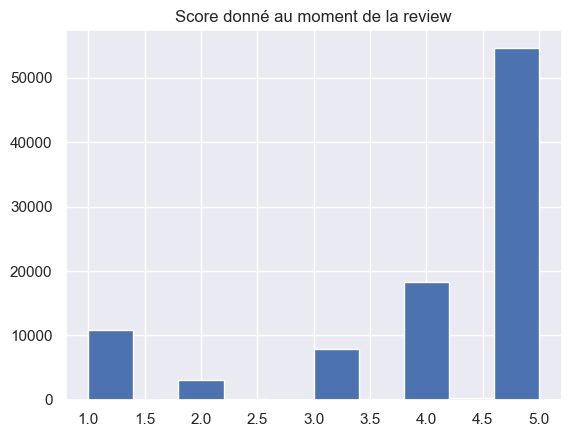

In [77]:
sns.set_theme()
fusion.hist(column = 'review_score')
plt.title("Score donné au moment de la review")
plt.show()

In [78]:
fusion['review_score'].describe()

count    95379.000000
mean         4.084994
std          1.341631
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: review_score, dtype: float64

On peut également décider de remplacer par la moyenne (environ 4) les notes non attribuées.

In [79]:
fusion = fusion.drop(columns="order_status")

# 4. Analyse

## 4.1 Analyse univariée

Procédons par "ordre d'importance"

#### Récence

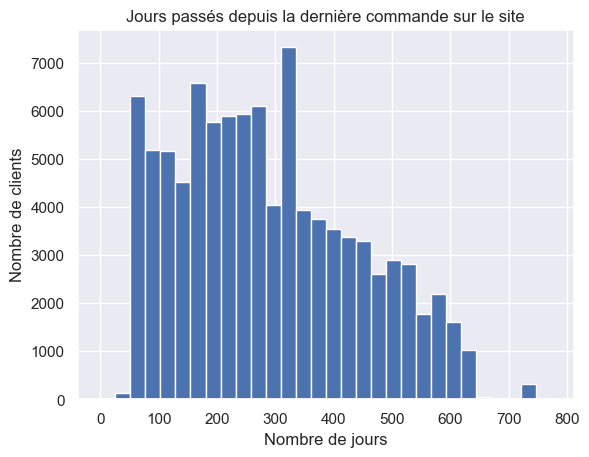

In [80]:
fusion.hist(column = 'recency(days)',bins = 30)
plt.title("Jours passés depuis la dernière commande sur le site")
plt.ylabel("Nombre de clients")
plt.xlabel("Nombre de jours")
plt.show()

Puisqu'on a peu de clients qui reviennent, mon interprétation de ce graphique est que, globalement, la fréquentation du site est en hausse sur la période.

#### Fréquence

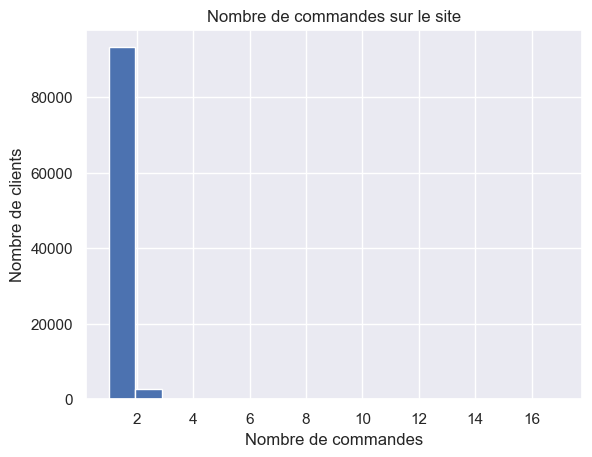

In [81]:
fusion.hist(column = 'commands_amount',bins = 17)
plt.title("Nombre de commandes sur le site")
plt.ylabel("Nombre de clients")
plt.xlabel("Nombre de commandes")
plt.show()

C'est très représentatif du fait que les clients, globalement... ne reviennent pas.
Essayons, pour voir, sans la première colonne.

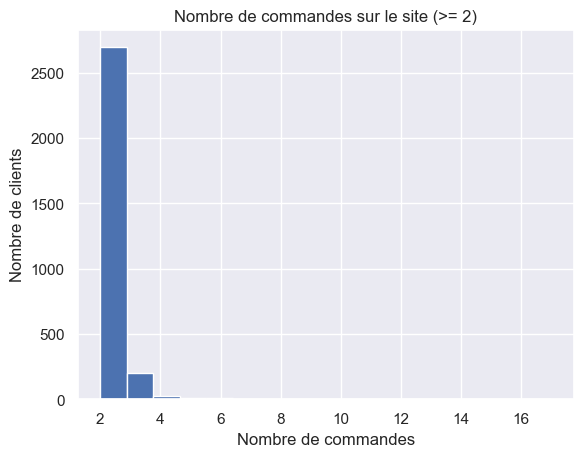

In [82]:
fusion.loc[fusion["commands_amount"] >1 ,:].hist(column = 'commands_amount',bins = 17)
plt.title("Nombre de commandes sur le site (>= 2)")
plt.ylabel("Nombre de clients")
plt.xlabel("Nombre de commandes")
plt.show()

In [83]:
fusion["commands_amount"].value_counts()

1.0     93155
2.0      2696
3.0       198
4.0        27
5.0         8
6.0         6
7.0         3
9.0         1
17.0        1
Name: commands_amount, dtype: int64

Même parmi les clients qui reviennent, il est très rare qu'ils soient vraiment fidélisés...

#### Monetary

In [84]:
fusion.describe()

,payment_value,review_score,freight_value,time_for_delivery(days),recency(days),commands_amount
count,96095.000000,95379.000000,95419.000000,93355.000000,96095.000000,96095.000000
mean,161.015338,4.084994,20.241691,12.526315,288.150008,1.034102
std,222.196432,1.341631,15.931975,9.549616,153.413215,0.212157
min,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
25%,62.120000,4.000000,13.370000,7.000000,164.000000,1.000000
50%,105.420000,5.000000,16.410000,10.000000,269.000000,1.000000
75%,176.865000,5.000000,21.290000,16.000000,397.000000,1.000000
max,13664.080000,5.000000,409.680000,210.000000,773.000000,17.000000


Certains clients ont dépensé jusqu'à 13664 BRL en une commande. C'est bien pour nous, mais on souhaite effectuer une visualisation ici. Je vais donc me restreindre à l'intervalle [0 , 1000]

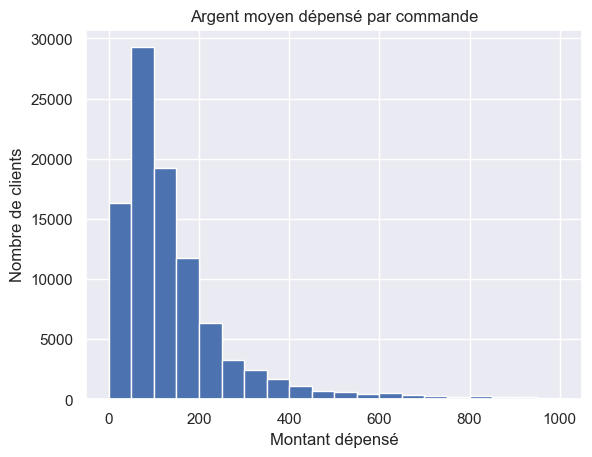

In [85]:
fusion.hist(column = 'payment_value',bins = 20, range = [0,1000])
plt.title("Argent moyen dépensé par commande")
plt.ylabel("Nombre de clients")
plt.xlabel("Montant dépensé")
plt.show()

La majeure partie des commandes est inférieure à 200 dollars et la classe la plus représentée est entre 50 et 100$.

On peut aussi le représenter par un boxplot.

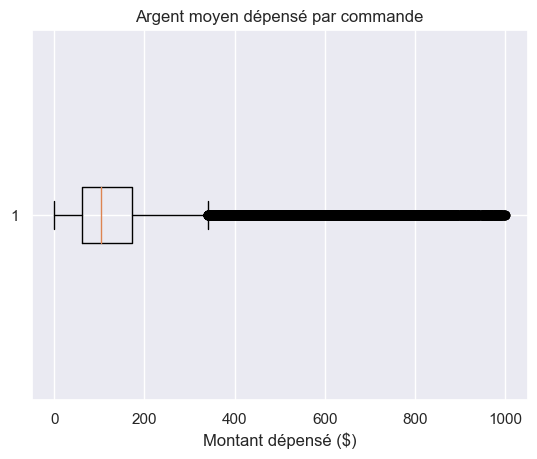

In [86]:
plt.boxplot(fusion.loc[fusion["payment_value"] <1000 ,:]["payment_value"],vert = False)
#J'ai restreint aux valeurs sous 1000 encore une fois pour des questions de lisibilité.
plt.title("Argent moyen dépensé par commande")
plt.xlabel("Montant dépensé ($)")
plt.show()

La variance reste tout de même nettement plus intéresante que pour "frequency"

#### Review_score

On l'a vu plus tôt en "describe", la plupart des reviews sont des notes de 5/5.

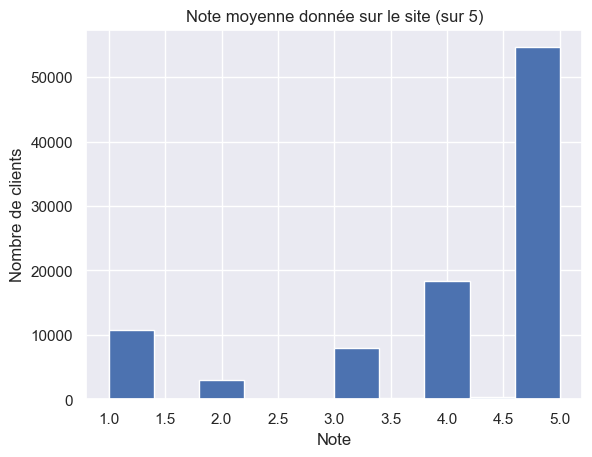

In [87]:
fusion.hist('review_score')
plt.title("Note moyenne donnée sur le site (sur 5)")
plt.ylabel("Nombre de clients")
plt.xlabel("Note")
plt.show()

Même s'il existe des notes "non rondes" (moyenne des notes pour les clients venus plusieurs fois), elles sont en quantité insuffisantes pour apparaître ici. Néanmoins, elles existent, les voici :

In [88]:
fusion["review_score"].value_counts()

5.000000    54604
4.000000    18320
1.000000    10795
3.000000     7908
2.000000     3032
4.500000      305
3.500000      163
2.500000       95
4.750000       19
4.666667       19
4.333333       19
3.666667       17
1.500000       16
4.250000       11
3.250000        8
3.750000        6
1.750000        6
3.333333        5
2.333333        4
2.750000        4
1.666667        4
4.200000        3
1.250000        3
4.833333        2
2.666667        2
3.777778        1
2.166667        1
3.833333        1
4.444444        1
4.764706        1
3.800000        1
1.333333        1
2.777778        1
3.900000        1
Name: review_score, dtype: int64

Globalement, on repère bien les "satisfaits" et les "haters".

#### Les autres variables

On va regarder rapidement ce qu'il se passe pour : 

customer_state : les statistiques régionales

payment_type : les statistiques par mode de paiement

time_for_delivery : le délai 

product_category_name : le type de produit

In [89]:
fusion["customer_state"].value_counts()

SP    40294
RJ    12377
MG    11255
RS     5277
PR     4882
SC     3529
BA     3276
DF     2073
ES     1963
GO     1951
PE     1604
CE     1311
PA      949
MT      875
MA      725
MS      693
PB      519
PI      482
RN      474
AL      401
SE      341
TO      273
RO      239
AM      143
AC       77
AP       67
RR       45
Name: customer_state, dtype: int64

L'état de Sao Paulo représente la moitié des clients. Viennent ensuite RJ (Rio) et MG (Minas Gerais)

In [90]:
fusion["payment_type"].value_counts() #Mes commentaires sont modestes, je ne suis même pas certain d'utiliser ces features ensuite.

credit_card    72444
boleto         19160
voucher         3001
debit_card      1487
not_defined        3
Name: payment_type, dtype: int64

énorme majorité de cartes de crédit. Beaucoup de "boleto", méthode de paiement spécifique au Brésil que j'aurai découvert grâce à ce projet.

In [91]:
fusion["product_category_name"].value_counts()

cama_mesa_banho                  8854
beleza_saude                     8531
esporte_lazer                    7355
informatica_acessorios           6444
moveis_decoracao                 6041
                                 ... 
cds_dvds_musicais                  12
la_cuisine                         11
fashion_roupa_infanto_juvenil       8
pc_gamer                            7
seguros_e_servicos                  2
Name: product_category_name, Length: 73, dtype: int64

On note qu'il n'y a "que" 73 catégories de produits. On pourrait, si on utilise cette feature, éliminer les catégories les moins remplies (par exemple moins de 100 individus), et observer si la catégorie de produit a un impact sur le comportement du client, qui sait ?

In [92]:
fusion["time_for_delivery(days)"].describe()

count    93355.000000
mean        12.526315
std          9.549616
min          1.000000
25%          7.000000
50%         10.000000
75%         16.000000
max        210.000000
Name: time_for_delivery(days), dtype: float64

Une personne a apparemment attendu plus de 6 mois pour son colis...
A part ça, la répartition semble être statistiquement exploitable, observons sur un histogramme

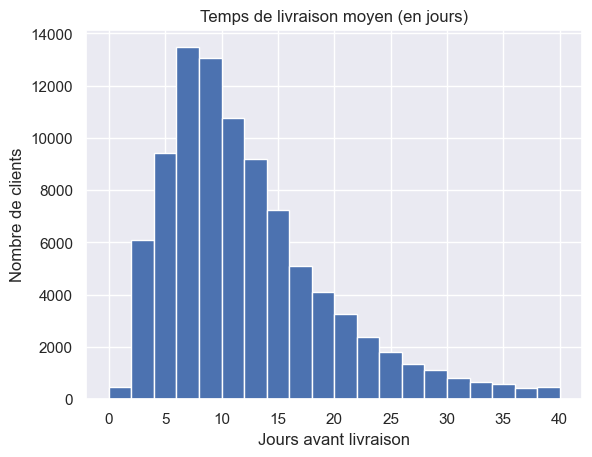

In [93]:
fusion.hist("time_for_delivery(days)",bins = 20, range = [0,40]) #Je restreins à cause des outliers
plt.title("Temps de livraison moyen (en jours)")
plt.ylabel("Nombre de clients")
plt.xlabel("Jours avant livraison")
plt.show()

Ce n'est pas tout à fait une distribution normale, mais on a un centre clair, et une décroissance des valeurs lorsqu'on s'écarte de celui-ci. 
Si on est amenés à utiliser cette feature (probablement ma préférée dans les "seconds couteaux"), elle sera fort probablement plus intéressante que "payment type", par exemple, qui n'a essentiellement que 2 catégories.

## 4.2 Analyse bivariée

Je vais faire court ici, puisqu'on est sur de l'apprentissage non supervisé et qu'on n'a pas de targets.
Je vais simplement (et uniquement pour les variables numériques) rechercher d'éventuelles corrélations.

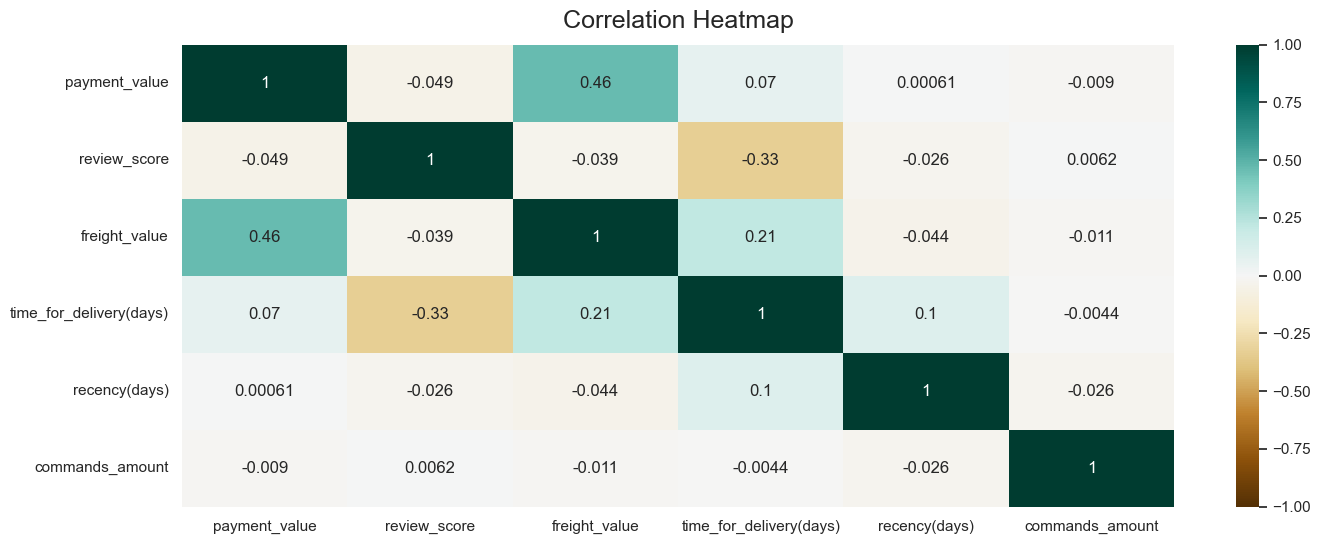

In [94]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(fusion.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)
plt.show()

Je vais parler d'abord des corrélations trouvées :

- les frais de transport sont corrélés au temps de livraison

C'est logique. Plus c'est loin, plus c'est long et cher de transporter le paquet.

- les frais de transport sont liés au prix total de paiement

C'est très logique. Les deux concernent le prix, et les frais de transport sont inclus dans payment_value.

- le temps de livraison est corrélé négativement au score de la review

Cela me semble très logique, d'ailleurs c'est d'abord en pensant à cela que j'ai créé cette feature au départ.



Pour le reste, les corrélations sont absolument inexistantes. C'est plutôt bienvenu, parce qu'il nous reste peu de features, alors autant qu'elles ne soient pas abîmées par des corrélations entre elles.

## 4.3 Analyse multivariée : PCA

Je vais réaliser, dans un premier temps, une seule ACP, avec les trois principales (RFM) features.
Ensuite, en fonction de mes modélisations futures, je reviendrai à cet endroit pour effectuer d'éventuelles ACP en amont de mes modélisations.

In [95]:
cols = ["recency(days)","commands_amount","payment_value"]
fusion_pca = fusion.loc[:,cols]
#On récupère ce dont on a besoin pour la suite
features = fusion_pca.columns
X = fusion_pca.values

In [96]:
#On scale les données.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [97]:
pca = PCA(n_components = 3)
pca.fit(X_scaled)
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([34.25, 33.32, 32.43])

Il semblerait que la PCA soit assez inefficace. En effet, les trois axes captent peu ou prou la même quantité de variance.

On s'en doutait au vu des non corrélations de nos features.

In [98]:
#On reprend les fonctions des projets précédents pour l'ACP
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)
    
    
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()


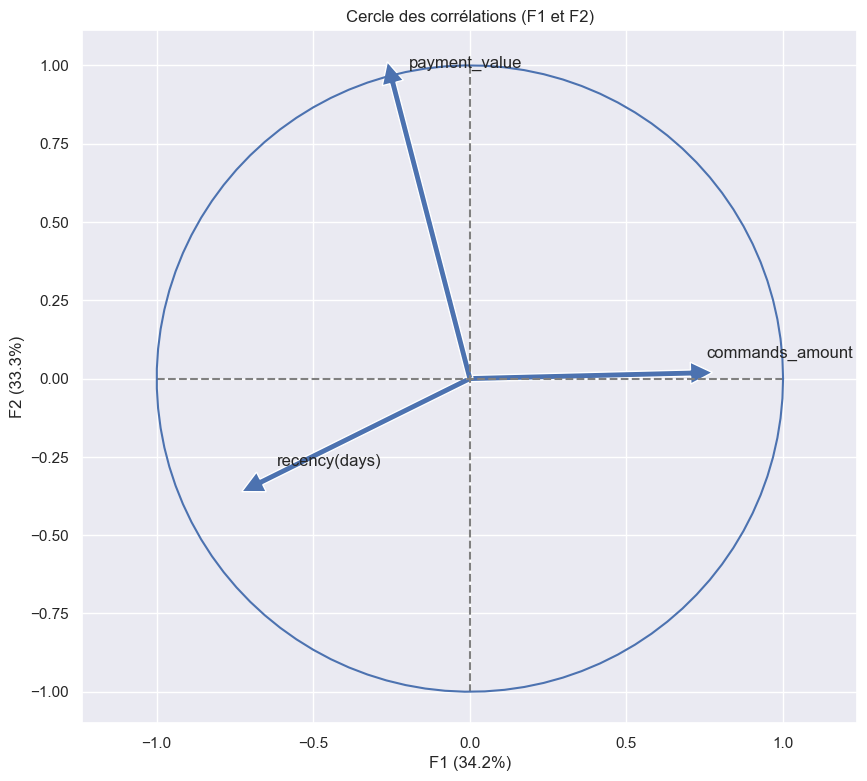

In [99]:
correlation_graph(pca,(0,1),features)

J'ai du mal à l'interpréter. L'axe 1 semble ressembler à la fréquence, et l'axe 2 au monétaire. Toutefois dans les 2 cas on a une naticorrélation à la récence, que j'interprète difficilement.

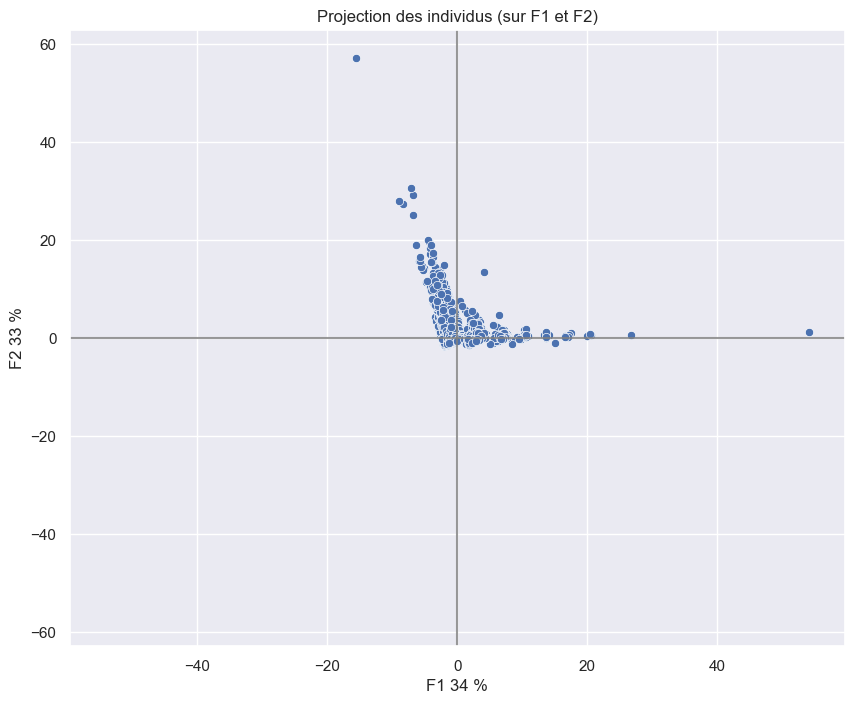

In [100]:
X_proj = pca.transform(X_scaled)
x_y = [0,1]
display_factorial_planes(X_proj, x_y,pca)

La forme de la projection est singulière. En première lecture, ce que je vois à l'oeil, c'est qu'on observe se détacher les individus ayant commandé plusieurs fois. (Sur la droite)

### 4.3.2 Deuxième PCA

Cette fois-ci, on ajoute une nouvelle feature : le review_score.

En effet, lors de notre premier clustering (cf. notebook suivant), on a réussi à segmenter nos clients en 4 clusters interprétables.

Le review score permet de connaître la satisfaction du client, et il permettrait d'ajouter un peu d'information à notre clustering.

Commençons par écarter les valeurs manquantes.

In [101]:
fusion.isnull().sum()

customer_state                0
payment_type                  0
payment_value                 0
review_score                716
freight_value               676
product_category_name      2085
time_for_delivery(days)    2740
recency(days)                 0
commands_amount               0
dtype: int64

Il ne manque que 716 valeurs. Je peux :

- Les écarter
- Imputer par la moyenne (4). Au vu de la faible proportion de valeurs manquantes, ces deux solutions sont envisageables.
- Essayer de retrouver, dans la variable "texte de la review", quand elle est présente, le sentiment général dégagé par le texte, et en déduire une note.

A mon avis, et au vu du faible nombre de valeurs manquantes, je n'ai pas envie de passer du temps sur l'analyse textuelle, d'autant que je crois savoir que ce sera le sujet d'un prochain projet.

Ma préférence mathématique se porte sur écarter plutôt qu'imputer, afin d'éviter d'introduire de "fausses" informations dans mes données.

In [102]:
fusion_4_features = fusion.loc[~(fusion["review_score"].isnull()),["recency(days)","commands_amount","payment_value","review_score"]]
fusion_4_features.shape

(95379, 4)

In [103]:
#Je prépare la PCA
features = fusion_4_features.columns
X = fusion_4_features.values

#Je scale mes données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Je regarde le scree
pca = PCA(n_components = 4)
pca.fit(X_scaled)
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([26.55, 25.37, 24.5 , 23.57])

Encore une fois, les valeurs sont très équilibrées, et c'est encore une fois dû aux corrélations inexistantes entre nos features (comme vu plus tôt sur la matrice des corrélations).

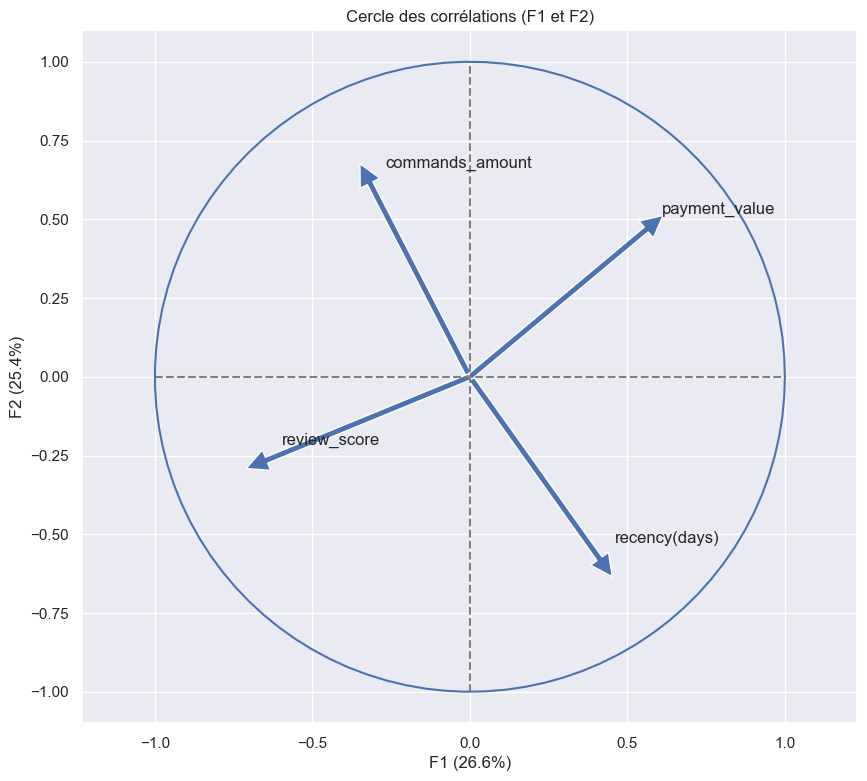

In [104]:
correlation_graph(pca,(0,1),features)

J'ai beau me creuser les méninges, c'est vraiment très difficile à interpréter, d'autant plus que j'ai vu le scree juste avant.

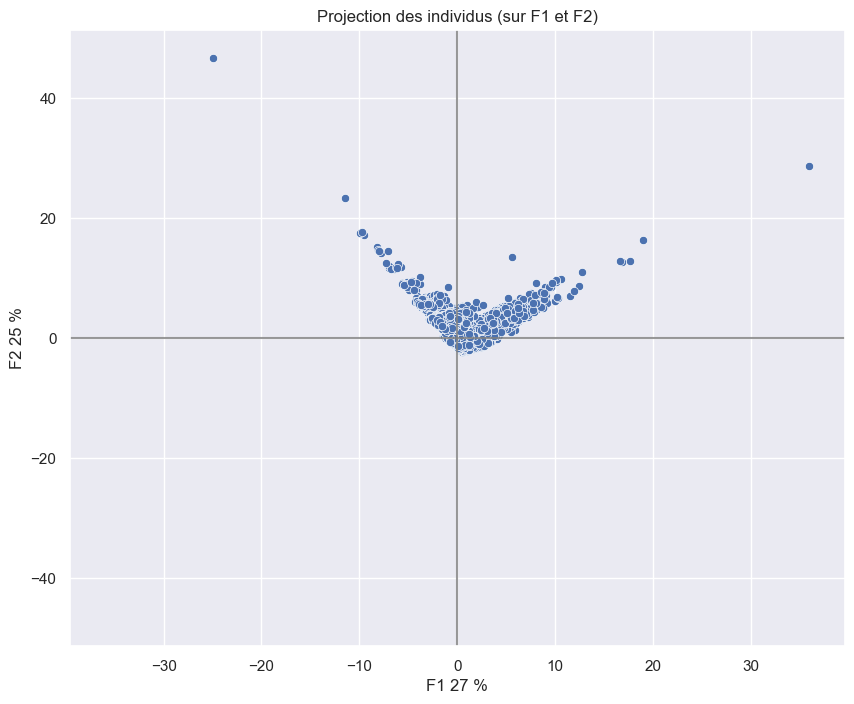

In [105]:
X_proj = pca.transform(X_scaled)
x_y = [0,1]
display_factorial_planes(X_proj, x_y,pca)

La "forme" observée reste la même que sans le review_score. On obtient un "gros paquet" central, avec des outliers en terme de fréquence et de payment value. On observe de probables futurs clusters qui se détachent légèrement à droite et à gauche.

# 5. Exportation des données

In [106]:
fusion.to_csv("fusion.csv",index = False)